# **Praktik Kerja Lapangan**
<hr>

2021 Genap

Oleh:

1. Aldi Fianda Putra    (195150201111034) - Ketua
2. Riski Darmawan   (195150200111039)
3. Hasyir Daffa Ibrahim     (195150207111039)

<hr>
<hr>
<hr>

# 1. Deskripsi Data

Dataset terdiri dari 4 instrumen:
1. Achievement Emotion Questionnaire (AEQ-S)
    > Dibagi menjadi Class-Related Emotions dan Learning-Related Emotions
    > Masing-masing mengevaluasi emosi positif dan emosi negatif
2. Depression, Anxiety, and Stress Scale (DASS) 21
3. Emotion Regulation Questionnaire (ERQ)
4. Nilai Mahasiswa
    > Dibagi menjadi Nilai Pre-test dan Post-test

Sumber: Kuesioner Google Form
Responden: Mahasiswa Fakultas Ilmu Komputer, Universitas Brawijaya

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("ignore", category=PendingDeprecationWarning, module="__main__")
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
%%capture

# Import modul / dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from collections import Counter

# Install package yang dibutuhkan
!pip install openpyxl

In [3]:
# read dataset
df_aeq = pd.read_csv("Kuisioner AEQ-S.csv")
df_aeq = df_aeq[2:].reset_index(drop=True)  # menghapus baris data testing kuesioner

df_dass = pd.read_csv("Kuisioner DASS21.csv")
df_dass = df_dass[1:].reset_index(drop=True)  # menghapus baris data testing kuesioner

df_erq = pd.read_csv("Kuisoner ERQ.csv")
df_erq = df_erq[1:].reset_index(drop=True)  # menghapus baris data testing kuesioner

In [4]:
df_aeq.head(2)

,Timestamp,Nama Mahasiswa,NIM,Mata Kuliah,1. Saya senang berada di kelas,2. Saya berharap untuk belajar banyak di kelas ini,3. Saya termotivasi untuk mengikuti kelas ini karena seru,4. Saya sangat menikmati berpartisipasi di kelas ini sehingga saya mendapatkan energi,1. Saya percaya diri ketika saya pergi ke kelas,2. Saya optimis pergi ke kelas,...,"3. Karena saya memiliki begitu banyak masalah dengan materi pelajaran, saya menghindari membahasnya","4. Ketika seseorang memperhatikan betapa sedikitnya pemahaman saya, saya menghindari kontak mata",1. Saya merasa tidak berdaya,2. Saya pasrah dengan kenyataan bahwa saya tidak memiliki kapasitas untuk menguasai materi ini,3. Saya merasa sangat tidak berdaya sehingga saya tidak dapat memberikan studi saya dengan upaya penuh.,4. Kurangnya kepercayaan diri saya membuat saya lelah bahkan sebelum saya mulai,1. Belajar untuk mata kuliah saya membuat saya bosan.,2. Materinya sangat membosankan sampai-sampai saya melamun,3. Saya lebih suka menunda pekerjaan yang membosankan ini sampai besok,4. Saat belajar sepertinya saya mengantuk karena sangat membosankan
0,2022/04/27 10:17:01 pm GMT+7,Aditya Ikhwan Saputro,205150207111012,Lainnya,4,4,4,4.0,3,3.0,...,2,2,1,1,1,1,1,1,2,2
1,2022/04/27 10:18:44 pm GMT+7,Muhamad Fauzan Wahyudi,205150200111037,Lainnya,4,4,4,4.0,3,3.0,...,3,3,1,1,1,1,2,1,3,2


In [5]:
df_dass.head(2)

,Timestamp,Nama Mahasiswa,NIM,Mata Kuliah,1. Saya sulit untuk ditenangkan,2. Saya merasa mulut saya kering,3. Saya tidak dapat merasakan perasaan yang positif,4. Saya mengalami kesulitan bernafas,5. Saya sulit mendapatkan semangat untuk melakukan sesuatu,6. Saya cenderung bertindak berlebihan,...,12. Saya sulit untuk rileksasi,13. Saya merasa sedih dan murung,14. Saya merasa tidak sabar terhadap sesuatu yang membuat saya bertahan dengan apa yang telah saya lakukan,15. Saya mudah menjadi panik,16. Saya tidak antusias terhadap sesuatu,17. Saya merasa tidak berharga,18. Saya mudah tersentuh,19. Saya merasakan kerja jantung saya,20. Saya merasa takut tanpa alasan yang jelas,21. Saya merasa hidup ini tidak berarti
0,2022/04/27 10:18:15 pm GMT+7,Aditya Ikhwan Saputro,205150207111012,Lainnya,3,2,2,2,2,2,...,2,2,2,2,2,1,3,2,2,2
1,2022/04/27 10:20:10 pm GMT+7,Muhamad Fauzan Wahyudi,205150200111037,Lainnya,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1


In [6]:
df_erq.head(2)

,Timestamp,Nama Mahasiswa,NIM,Mata Kuliah,"1.\t_____ Ketika saya ingin merasakan lebih banyak emosi positif (seperti kegembiraan atau hiburan), saya merubah apa yang saya pikirkan.",2.\t_____ Saya menyimpan emosi saya untuk diri saya sendiri.,"3.\t_____ Ketika saya ingin mengurangi emosi negatif (seperti kesedihan atau kemarahan), saya mengubah apa yang saya pikirkan.","4.\t_____ Ketika saya merasakan emosi positif, saya berhati-hati untuk tidak mengungkapkannya.","5.\t_____ Ketika saya menghadapi situasi stres, saya membuat diri saya memikirkannya dengan cara yang membantu saya tetap tenang.",6.\t_____ Saya mengendalikan emosi saya dengan tidak mengungkapkannya.,"7.\t_____ Ketika saya ingin merasakan emosi yang lebih positif, saya mengubah cara saya berpikir tentang situasi tersebut.",8.\t_____ Saya mengendalikan emosi saya dengan mengubah cara saya berpikir tentang situasi yang saya hadapi.,"9.\t_____ Ketika saya merasakan emosi negatif, saya memastikan untuk tidak mengungkapkannya.","10.\t_____ Ketika saya ingin mengurangi emosi negatif, saya mengubah cara saya berpikir tentang situasi tersebut."
0,2022/04/27 10:19:24 pm GMT+7,Aditya Ikhwan Saputro,205150207111012,Lainnya,5,5,4,3,4,3,4,4,5,5
1,2022/04/27 10:22:10 pm GMT+7,Muhamad Fauzan Wahyudi,205150200111037,Lainnya,2,7,4,5,4,5,5,5,5,7


<hr>
<hr>

# 2. EDA & Preprocessing

## 2.1. EDA (Exploratory Data Analysis)

Mendapatkan informasi umum dari dataset

In [7]:
# Mendapatkan dimensi dataset, yaitu jumlah record dan kolom
print(df_aeq.shape)
print(df_dass.shape)
print(df_erq.shape)

(257, 68)
(249, 25)
(248, 14)


Mendapatkan informasi missing value pada dataset

In [8]:
# Mendapatkan informasi missing value
print(df_aeq.isnull().values.any())
print(df_dass.isnull().values.any())
print(df_erq.isnull().values.any())

True
False
False


## 2.2. Preprocessing

### Fix Value

Pada data kuesioner, terdapat NIM atau Nomor Induk Mahasiswa yang salah. Pada tahap preprocessing, akan dilakukan pengambilan data mahasiswa yang mengisi kuesioner secara lengkap saja. Oleh sebab itu, hal ini dapat memengaruhi data hasil preprocessing dan NIM harus diperbaiki secara manual. 

In [9]:
# Memperbaiki NIM yang salah pada AEQ
# Nazwa Annila -> 215150701111009
df_aeq.loc[df_aeq["Nama Mahasiswa"] == "Nazwa Annila", "NIM"] = 215150701111009

# Erwin Marbinoto Tamba -> 215150701111026
df_aeq.loc[df_aeq["Nama Mahasiswa"] == "Erwin Marbinoto Tamba", "NIM"] = 215150701111026

# sorting AEQ
# df_aeq.sort_values(by="NIM")

In [10]:
# Memperbaiki NIM yang salah pada DASS
# Muhammad Rusydi Hanan -> 205150207111015
df_dass.loc[df_dass["Nama Mahasiswa"] == "Muhammad Rusydi Hanan", "NIM"] = 205150207111015

# Wulan Della ELfarin -> 205150601111008
df_dass.loc[df_dass["Nama Mahasiswa"] == "Wulan Della ELfarin", "NIM"] = 205150601111008

# sorting DASS
# df_dass.sort_values(by="NIM")

In [11]:
# Memperbaiki NIM yang salah pada ERQ
# Rafli Ardiansyah -> 215150701111030
df_erq.loc[df_erq["Nama Mahasiswa"] == "Rafli Ardiansyah", "NIM"] = 215150701111030

# zainiyah nafiatul muna -> 205150201111030
df_erq.loc[df_erq["Nama Mahasiswa"] == "zainiyah nafiatul muna", "NIM"] = 205150201111030

# Wulan Della Elfarin -> 205150601111008
df_erq.loc[df_erq["Nama Mahasiswa"] == "Wulan Della Elfarin", "NIM"] = 205150601111008

# Bagas Raditya  N L -> 205150407111019
df_erq.loc[df_erq["Nama Mahasiswa"] == "Bagas Raditya  N L", "NIM"] = 205150407111019

# sorting ERQ
# df_erq.sort_values(by="NIM")

### Merge Dataframe AEQ, DASS, dan ERQ

Proses perbaikan data NIM mahasiswa sebelumnya dibutuhkan untuk melakukan proses selanjutnya. Hal ini disebabkan karena NIM adalah identifier yang pada proses ini digunakan sebagai kolom patokan penggabungan dataset. Penggabungan dataset AEQ, DASS, dan ERQ dilakukan berdasarkan kolom NIM dengan metode left join.  

In [12]:
# menggabungkan tiga dataset afektif dengan metode left join pada kolom NIM
df = pd.merge(df_aeq, df_dass, on=['NIM'], how='left').merge(df_erq, on=['NIM'], how='left')

In [13]:
# Mendapatkan dimensi dataset, yaitu jumlah record dan kolom
# merged dataframe
print("Dataframe Merge")
print(df.shape)

print("\nDataframe sebelum Merge")
print(df_aeq.shape)
print(df_dass.shape)
print(df_erq.shape)

Dataframe Merge
(258, 105)

Dataframe sebelum Merge
(257, 68)
(249, 25)
(248, 14)


Didapatkan jumlah data setelah proses penggabungan (merge) adalah 258 baris data.

In [14]:
df.head(2)

,Timestamp_x,Nama Mahasiswa_x,NIM,Mata Kuliah_x,1. Saya senang berada di kelas,2. Saya berharap untuk belajar banyak di kelas ini,3. Saya termotivasi untuk mengikuti kelas ini karena seru,4. Saya sangat menikmati berpartisipasi di kelas ini sehingga saya mendapatkan energi,1. Saya percaya diri ketika saya pergi ke kelas,2. Saya optimis pergi ke kelas,...,"1.\t_____ Ketika saya ingin merasakan lebih banyak emosi positif (seperti kegembiraan atau hiburan), saya merubah apa yang saya pikirkan.",2.\t_____ Saya menyimpan emosi saya untuk diri saya sendiri.,"3.\t_____ Ketika saya ingin mengurangi emosi negatif (seperti kesedihan atau kemarahan), saya mengubah apa yang saya pikirkan.","4.\t_____ Ketika saya merasakan emosi positif, saya berhati-hati untuk tidak mengungkapkannya.","5.\t_____ Ketika saya menghadapi situasi stres, saya membuat diri saya memikirkannya dengan cara yang membantu saya tetap tenang.",6.\t_____ Saya mengendalikan emosi saya dengan tidak mengungkapkannya.,"7.\t_____ Ketika saya ingin merasakan emosi yang lebih positif, saya mengubah cara saya berpikir tentang situasi tersebut.",8.\t_____ Saya mengendalikan emosi saya dengan mengubah cara saya berpikir tentang situasi yang saya hadapi.,"9.\t_____ Ketika saya merasakan emosi negatif, saya memastikan untuk tidak mengungkapkannya.","10.\t_____ Ketika saya ingin mengurangi emosi negatif, saya mengubah cara saya berpikir tentang situasi tersebut."
0,2022/04/27 10:17:01 pm GMT+7,Aditya Ikhwan Saputro,205150207111012,Lainnya,4,4,4,4.0,3,3.0,...,5.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0
1,2022/04/27 10:18:44 pm GMT+7,Muhamad Fauzan Wahyudi,205150200111037,Lainnya,4,4,4,4.0,3,3.0,...,2.0,7.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,7.0


### Drop data yang tidak lengkap respondennya

Pada dataset hasil gabungan, diketahui bahwa terdapat banyak sekali data yang tidak lengkap. Hal ini disebabkan karena terdapat responden kuesioner yang tidak mengisi kuesioner dengan lengkap, baik itu tidak mengisi satu atau lebih kuesioner. Data yang tidak lengkap seperti ini dapat menyebabkan masalah pada proses data sains yang dilakukan. Oleh sebab itu, data yang tidak lengkap respondennya akan dihapus.

In [15]:
# menghapus data responden yang tidak lengkap
df = df.drop(labels=[13,14,25,67,74,85,92,104,108,129,131,132,137,138,143,152,176,241,199,227,182,148], axis=0).reset_index(drop=True)

In [16]:
# pengecekan jumlah data setelah menghapus responden yang tidak lengkap
print("Jumlah data =",df.shape)
print("Missing Value =",df.isnull().values.any())

Jumlah data = (236, 105)
Missing Value = True


Didapatkan jumlah data setelah proses penghapusan data responden tidak lengkap adalah 236 baris data. Selain itu, diketahui terdapat missing value.

### Drop kolom yang redundan

Pada dataset hasil gabungan, diketahui bahwa terdapat kolom redundan. Kolom redundan disebabkan karena nama kolom yang sama pada dataset yang digabungkan. Kolom redundan tersebut akan dihapus karena tidak diperlukan.

In [17]:
# menghapus kolom redundan
df = df.drop(['Timestamp_y','Nama Mahasiswa_y','Mata Kuliah_y','Timestamp','Nama Mahasiswa','Mata Kuliah'], axis=1)
# menamai ulang kolom agar sesuai
df = df.rename({'Timestamp_x':'Timestamp', 'Nama Mahasiswa_x':'Nama Mahasiswa', 'Mata Kuliah_x':'Mata Kuliah'}, axis='columns')

### Drop nama yang duplikat

Pada dataset hasil gabungan, diketahui bahwa terdapat data dengan nama yang duplikat atau sama. Baris data dengan nama yang duplikat tersebut akan dihapus.

In [18]:
# melakukan pengecekan data nama yang duplikat
dpDF = df["Nama Mahasiswa"].copy()
duplicateDF = dpDF[dpDF.duplicated()]
print("Data yang masih duplikat :")
print(duplicateDF)

Data yang masih duplikat :
193    Aflah Hanif Nadanta
Name: Nama Mahasiswa, dtype: object


In [19]:
# menghapus baris data nama yang duplikat
df = df.drop(labels=[193], axis=0).reset_index(drop=True)

In [20]:
# pengecekan ulang data nama yang duplikat
dpDF = df["NIM"].copy()
duplicateDF = dpDF[dpDF.duplicated()]
print("Data yang masih duplikat :")
print(duplicateDF)

Data yang masih duplikat :
Series([], Name: NIM, dtype: int64)


### Handle Missing Value dengan Imputasi Data

Diketahui terdapat missing value pada dataset. Missing value di sini disebabkan karena kesalahan pengaturan kuesioner Google Form sehingga partisipan, baik disengaja maupun tidak, melewatkan satu atau lebih butir pertanyaan kuesioner. Untuk mengatasi hal tersebut, missing value ditangani (handle) dengan melakukan imputasi data menggunakan nilai rata-rata / mean.

In [21]:
# # fungsi imputasi missing value pada dataset dengan mean / rata-rata
def imputasi(df_input):
  list_columns = df_input.columns[4:]
  for column in list_columns:
    df_input[column] = df_input[column].fillna(round(df_input[column].mean()))
  return df_input

In [22]:
# Letak Missing Value:
# Saya sangat menikmati
# - Gheri Jelita
# Saya optimis
# - Sofita Hidayatul Maghfiroh
# - Danuar Wiranata

# mengaplikasikan fungsi imputasi pada dataset
df = imputasi(df)

In [23]:
# cek apakah masih terdapat missing value
df.isnull().values.any()

False

Pada data imputasi diatas terlihat sudah tidak ada data yang hilang sehingga preprocessing dapat dilanjutkan ke tahap berikutnya.

### Merge Data Emosi dengan Nilai Pre-test dan Post-test

Serupa dengan proses penggabungan data sebelumnya, pada proses ini dilakukan penggabungan dataset faktor afektif dengan nilai (kinerja mahasiswa) berdasarkan kolom NIM dengan metode left join.

In [24]:
# read dataset
nilai =pd.read_csv('df_nilai.csv')
# penggabungan dataset
df=df.merge(nilai, on="NIM", how='left')
df.shape

(235, 102)

In [25]:
# pengecekan missing value
df.isnull().values.any()

True

Serupa dengan proses sebelumnya, setelah proses merge data terdapat missing value yang diakibatkan karena terdapat responden kuesioner yang tidak mengisi kuesioner dengan lengkap, baik itu tidak mengisi satu atau lebih kuesioner. Untuk itu dilakukan penghapusan data yang tidak lengkap.

In [26]:
# menghapus data yang tidak lengkap
df=df.dropna()
# pengecekan missing value
df.isnull().values.any()

False

Diketahui data sudah tidak memiliki missing value.

In [27]:
# melakukan pengecekan data yang duplikat
dpDF = df["NIM"].copy()
duplicateDF = dpDF[dpDF.duplicated()]
print("Data yang masih duplikat :")
print(duplicateDF)

Data yang masih duplikat :
Series([], Name: NIM, dtype: int64)


Diketahui tidak ada data yang duplikat.

In [28]:
# cek dimensi dataset
df.shape

(202, 102)

Diketahui bahwa dataset yang digunakan dalam proyek ini memiliki 202 baris data dengan 102 fitur.

### Memisahkan Kuisioner AEQ, DASS, ERQ, dan Kinerja Mahasiswa

Untuk memudahkan proses data sains pada proyek ini, setiap data afektif dan kinerja mahasiswa dipisahkan menjadi masing-masing variabel yang berbeda.

In [29]:
# Memisahkan nim dan mata kuliah
df_nim = df.iloc[:, 2:4]

# Memisahkan kategori dataframe
df_aeq_new = df.iloc[:, 4:68]
df_dass_new = df.iloc[:, 68:89]
df_erq_new = df.iloc[:, 89:99]
df_nilai_new = df.iloc[:, 99:102]

# Menggabungkan nim dan kategori kuesioner
df_aeq_new = pd.concat([df_nim, df_aeq_new], axis=1, join='inner')
df_dass_new = pd.concat([df_nim, df_dass_new], axis=1, join='inner')
df_erq_new = pd.concat([df_nim, df_erq_new], axis=1, join='inner')
df_nilai_new = pd.concat([df_nim, df_nilai_new], axis=1, join='inner')

In [30]:
df_dass_new

,NIM,Mata Kuliah,1. Saya sulit untuk ditenangkan,2. Saya merasa mulut saya kering,3. Saya tidak dapat merasakan perasaan yang positif,4. Saya mengalami kesulitan bernafas,5. Saya sulit mendapatkan semangat untuk melakukan sesuatu,6. Saya cenderung bertindak berlebihan,7. Saya mengalami gemetaran pada tangan,8. Saya merasakan menggunakan banyak energi untuk cemas,...,12. Saya sulit untuk rileksasi,13. Saya merasa sedih dan murung,14. Saya merasa tidak sabar terhadap sesuatu yang membuat saya bertahan dengan apa yang telah saya lakukan,15. Saya mudah menjadi panik,16. Saya tidak antusias terhadap sesuatu,17. Saya merasa tidak berharga,18. Saya mudah tersentuh,19. Saya merasakan kerja jantung saya,20. Saya merasa takut tanpa alasan yang jelas,21. Saya merasa hidup ini tidak berarti
0,205150207111012,Lainnya,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0
1,205150200111037,Lainnya,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
2,205150200111025,Lainnya,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,205150200111067,Lainnya,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
4,205150201111016,Lainnya,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,195150200111028,VD,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
227,205150601111004,DIMP C,2.0,4.0,2.0,2.0,3.0,3.0,1.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,1.0
228,205150407111030,ADSI E,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0
231,205150607111006,DIMP C,1.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,...,1.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,3.0


### Mengubah Skala DASS

Pada pengumpulan data melalui kuesioner google form, skala pada kuesioner DASS yang diperoleh adalah skala 4-poin dengan rentang 1-4. Padahal, skala kuesioner DASS seharusnya berada pada rentang 0-3. Oleh sebab itu, dilakukan pengubahan skala untuk kuesioner DASS.

In [31]:
# Mengubah skala DASS dari 1-4 menjadi 0-3
df_dass_new.iloc[:,2:23] = df_dass_new.iloc[:,2:23].values - 1

df_dass_new

,NIM,Mata Kuliah,1. Saya sulit untuk ditenangkan,2. Saya merasa mulut saya kering,3. Saya tidak dapat merasakan perasaan yang positif,4. Saya mengalami kesulitan bernafas,5. Saya sulit mendapatkan semangat untuk melakukan sesuatu,6. Saya cenderung bertindak berlebihan,7. Saya mengalami gemetaran pada tangan,8. Saya merasakan menggunakan banyak energi untuk cemas,...,12. Saya sulit untuk rileksasi,13. Saya merasa sedih dan murung,14. Saya merasa tidak sabar terhadap sesuatu yang membuat saya bertahan dengan apa yang telah saya lakukan,15. Saya mudah menjadi panik,16. Saya tidak antusias terhadap sesuatu,17. Saya merasa tidak berharga,18. Saya mudah tersentuh,19. Saya merasakan kerja jantung saya,20. Saya merasa takut tanpa alasan yang jelas,21. Saya merasa hidup ini tidak berarti
0,205150207111012,Lainnya,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0
1,205150200111037,Lainnya,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,205150200111025,Lainnya,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,205150200111067,Lainnya,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,205150201111016,Lainnya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,195150200111028,VD,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
227,205150601111004,DIMP C,1.0,3.0,1.0,1.0,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0
228,205150407111030,ADSI E,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
231,205150607111006,DIMP C,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,...,0.0,3.0,1.0,2.0,0.0,3.0,3.0,3.0,3.0,2.0


## 2.3. Visualisasi

### Pie Chart Angkatan Responden

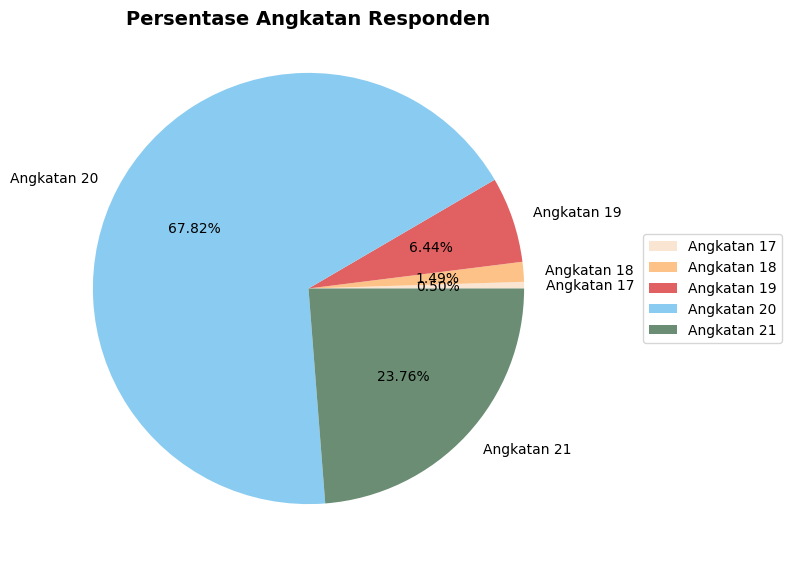

In [32]:
# membuat kolom baru, yaitu angkatan
df['Angkatan'] = df['NIM']//10**13

# mengurutkan dan memberikan postfix angkatan
angkatan = df['Angkatan'].value_counts().rename_axis('Angkatan').reset_index(name='Jumlah').sort_values(by=['Angkatan'])
angkatan = angkatan.replace({'Angkatan': {17: 'Angkatan 17', 18: 'Angkatan 18', 19:'Angkatan 19', 20:'Angkatan 20', 21:'Angkatan 21'}})

# plotting
fig = plt.figure(figsize =(15, 7))
colors=["#FAE5D3","#FCC287","#E16162", "#8ACCF1","#6A8D73","#CEDCBA","#49F6AC"]

plt.pie(angkatan['Jumlah'], labels=angkatan['Angkatan'],autopct='%1.2f%%',colors=colors)
plt.title("Persentase Angkatan Responden", y=.975,fontweight='bold',fontsize=14)

plt.ylabel('')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center')

# show plot
plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa partisipan atau responden terdiri dari mahasiswa Fakultas Ilmu Komputer Universitas Brawijaya angkatan 17 hingga 21. Partisipan didominasi oleh mahasiswa angkatan 20. Sedangkan angkatan 17 merupakan partisipan dengan jumlah paling sedikit.

### Pie Chart Kelas Responden

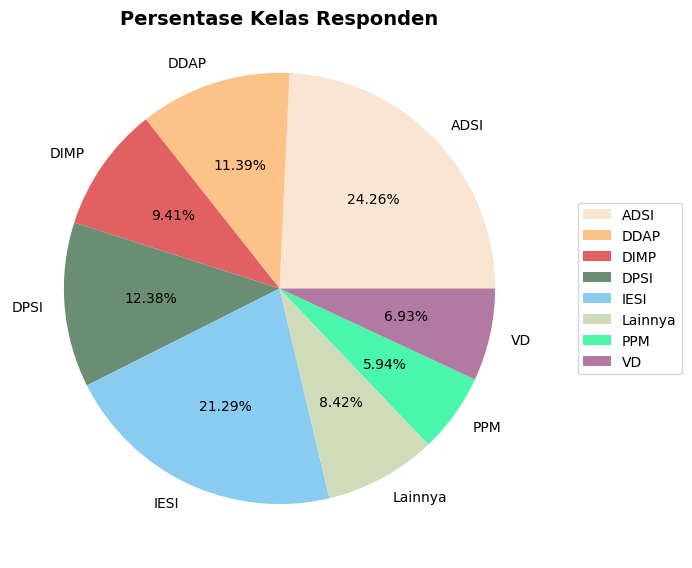

In [33]:
# membuat dataframe baru berupa gabungan jumlah responden berdasarkan mata kuliah
df_mk = df['Mata Kuliah'].copy(deep=True)
df_mk = df_mk.replace(['PPM F'], 'PPM')
df_mk = df_mk.replace(['IESI A'], 'IESI').replace(['IESI D'], 'IESI')
df_mk = df_mk.replace(['ADSI B'], 'ADSI').replace(['ADSI E'], 'ADSI')
df_mk = df_mk.replace(['DPSI C'], 'DPSI')
df_mk = df_mk.replace(['DDAP E'], 'DDAP')
df_mk = df_mk.replace(['DIMP A'], 'DIMP').replace(['DIMP C'], 'DIMP')
df_mk = df_mk.value_counts().rename_axis('Kelas').reset_index(name='Jumlah').sort_values(by=['Kelas'])

# plotting
fig = plt.figure(figsize =(15, 7))
colors=["#FAE5D3","#FCC287","#E16162", "#6A8D73","#8ACCF1","#CEDCBA","#49F6AC", "#b279a2"]

plt.pie(df_mk['Jumlah'], labels=df_mk['Kelas'],autopct='%1.2f%%',colors=colors)
plt.title("Persentase Kelas Responden", y=.975,fontweight='bold',fontsize=14)

plt.ylabel('')
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center')

# show plot
plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa data tersebar dengan cukup baik. Hal ini dapat dilihat pada proporsi setiap kelas mata kuliah yang tidak terlalu sedikit dan tidak terlalu banyak. Untuk kelas yang lebih mendominasi kontribusi proyek ada pada kelas ADSI dan IESI.

### Visualisasi AEQ

In [34]:
# AEQ - pengaturan kuesioner : class-related dan learning-related
# Positive Emotion: Enjoyment, Hope, Pride
# Negative Emotion: Anger, Anxiety, Shame, Hopelessness, Boredom

# membuat kolom baru untuk menjumlahkan data likert scale masing-masing mahasiswa
# berdasarkan jenis emosi dan pengaturannya
df_aeq_new['Class_Positive'] = df_aeq_new.iloc[:,2:14].sum(axis=1)
df_aeq_new['Class_Negative'] = df_aeq_new.iloc[:,14:34].sum(axis=1)
df_aeq_new['Learn_Positive'] = df_aeq_new.iloc[:,34:46].sum(axis=1)
df_aeq_new['Learn_Negative'] = df_aeq_new.iloc[:,46:66].sum(axis=1)

In [35]:
df_aeq_new.head(2)

,NIM,Mata Kuliah,1. Saya senang berada di kelas,2. Saya berharap untuk belajar banyak di kelas ini,3. Saya termotivasi untuk mengikuti kelas ini karena seru,4. Saya sangat menikmati berpartisipasi di kelas ini sehingga saya mendapatkan energi,1. Saya percaya diri ketika saya pergi ke kelas,2. Saya optimis pergi ke kelas,3. Saya percaya diri karena saya memahami materi,4. Percaya diri bahwa saya akan memahami materi memotivasi saya,...,3. Saya merasa sangat tidak berdaya sehingga saya tidak dapat memberikan studi saya dengan upaya penuh.,4. Kurangnya kepercayaan diri saya membuat saya lelah bahkan sebelum saya mulai,1. Belajar untuk mata kuliah saya membuat saya bosan.,2. Materinya sangat membosankan sampai-sampai saya melamun,3. Saya lebih suka menunda pekerjaan yang membosankan ini sampai besok,4. Saat belajar sepertinya saya mengantuk karena sangat membosankan,Class_Positive,Class_Negative,Learn_Positive,Learn_Negative
0,205150207111012,Lainnya,4,4,4,4.0,3,3.0,3,3,...,1,1,1,1,2,2,42.0,28,47,26
1,205150200111037,Lainnya,4,4,4,4.0,3,3.0,3,3,...,1,1,2,1,3,2,44.0,42,50,34


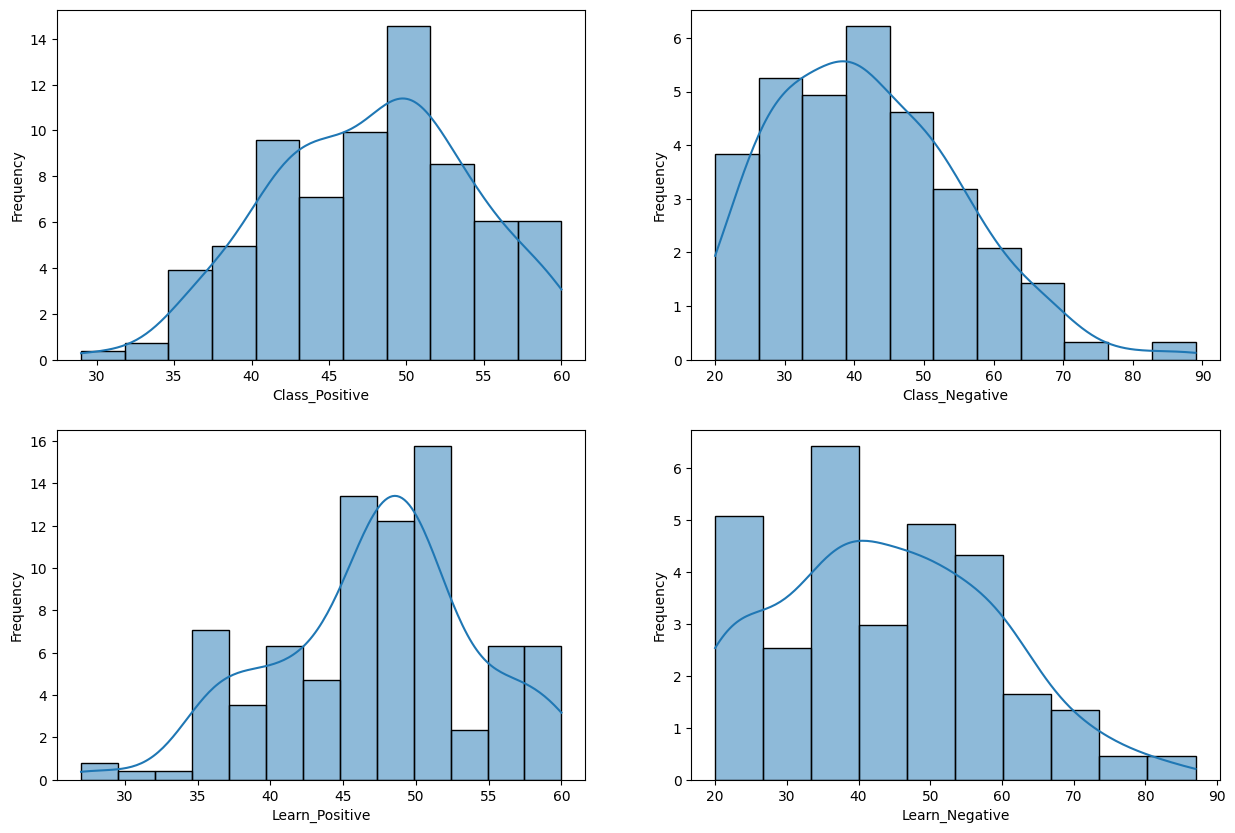

In [36]:
# Histogram untuk melihat persebaran data
# Positive dan Negative Skewed

# membuat plot histogram
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
num_column=['Class_Positive', 'Class_Negative', 'Learn_Positive', 'Learn_Negative']

axes = axes.ravel()
for col, ax in zip(num_column, axes):
    sns.histplot(data=df_aeq_new[col], kde=True, stat='frequency', ax=ax)

plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa distribusi data pada AEQ adalah distribusi normal dengan sifat skewed left (condong kiri) untuk emosi positif dan skewed right (condong kanan) untuk emosi negatif. Hal ini merupakan hal baik karena dapat diartikan dengan mahasiswa cenderung memiliki emosi positif yang tinggi dan emosi negatif yang rendah. 

In [37]:
# mengubah label aeq dari numerik menjadi label kategorikal berdasarkan intervalnya

# AEQ Emotion Scale
# Emotion - Positive
# 12 - 28 = Low
# 29 - 44 = Moderate
# 45 - 60 = High

df_aeq_new['Class_Positive'] = np.where(df_aeq_new['Class_Positive'].between(12,28), "Low", 
    np.where(df_aeq_new['Class_Positive'].between(29,44), "Moderate",
    np.where(df_aeq_new['Class_Positive'].between(45,60), "High", df_aeq_new['Class_Positive'])))
    
df_aeq_new['Learn_Positive'] = np.where(df_aeq_new['Learn_Positive'].between(12,28), "Low", 
    np.where(df_aeq_new['Learn_Positive'].between(29,44), "Moderate",
    np.where(df_aeq_new['Learn_Positive'].between(45,60), "High", df_aeq_new['Learn_Positive'])))

# Emotion - Negative
# 20 - 46 = Low
# 47 - 73 = Moderate
# 74 - 100 = Tinggi

df_aeq_new['Class_Negative'] = np.where(df_aeq_new['Class_Negative'].between(20,46), "Low", 
    np.where(df_aeq_new['Class_Negative'].between(47,73), "Moderate",
    np.where(df_aeq_new['Class_Negative'].between(74,100), "High", df_aeq_new['Class_Negative'])))

df_aeq_new['Learn_Negative'] = np.where(df_aeq_new['Learn_Negative'].between(20,46), "Low", 
    np.where(df_aeq_new['Learn_Negative'].between(47,73), "Moderate",
    np.where(df_aeq_new['Learn_Negative'].between(74,100), "High", df_aeq_new['Learn_Negative'])))

In [38]:
df_aeq_new.head(2)

,NIM,Mata Kuliah,1. Saya senang berada di kelas,2. Saya berharap untuk belajar banyak di kelas ini,3. Saya termotivasi untuk mengikuti kelas ini karena seru,4. Saya sangat menikmati berpartisipasi di kelas ini sehingga saya mendapatkan energi,1. Saya percaya diri ketika saya pergi ke kelas,2. Saya optimis pergi ke kelas,3. Saya percaya diri karena saya memahami materi,4. Percaya diri bahwa saya akan memahami materi memotivasi saya,...,3. Saya merasa sangat tidak berdaya sehingga saya tidak dapat memberikan studi saya dengan upaya penuh.,4. Kurangnya kepercayaan diri saya membuat saya lelah bahkan sebelum saya mulai,1. Belajar untuk mata kuliah saya membuat saya bosan.,2. Materinya sangat membosankan sampai-sampai saya melamun,3. Saya lebih suka menunda pekerjaan yang membosankan ini sampai besok,4. Saat belajar sepertinya saya mengantuk karena sangat membosankan,Class_Positive,Class_Negative,Learn_Positive,Learn_Negative
0,205150207111012,Lainnya,4,4,4,4.0,3,3.0,3,3,...,1,1,1,1,2,2,Moderate,Low,High,Low
1,205150200111037,Lainnya,4,4,4,4.0,3,3.0,3,3,...,1,1,2,1,3,2,Moderate,Low,High,Low


In [39]:
# mengambil data setiap kategori aeq untuk divisualisasikan
dict_aeq = {}
dict_aeq['Low'] = 0
dict_aeq['Moderate'] = 0
dict_aeq['High'] = 0

# Class_Positive
dict_aeq_cp = dict_aeq.copy()
dict_aeq_cp.update(df_aeq_new["Class_Positive"].value_counts().to_dict())

# Class_Negative
dict_aeq_cn = dict_aeq.copy()
dict_aeq_cn.update(df_aeq_new["Class_Negative"].value_counts().to_dict())

# Learn_Positive
dict_aeq_lp = dict_aeq.copy()
dict_aeq_lp.update(df_aeq_new["Learn_Positive"].value_counts().to_dict())

# Learn_Negative
dict_aeq_ln = dict_aeq.copy()
dict_aeq_ln.update(df_aeq_new["Learn_Negative"].value_counts().to_dict())


print("Class_Positive:", dict_aeq_cp)
print("Class_Negative:", dict_aeq_cn)
print("Learn_Positive:", dict_aeq_lp)
print("Learn_Negative:", dict_aeq_ln)

Class_Positive: {'Low': 0, 'Moderate': 66, 'High': 136}
Class_Negative: {'Low': 132, 'Moderate': 67, 'High': 3}
Learn_Positive: {'Low': 2, 'Moderate': 57, 'High': 143}
Learn_Negative: {'Low': 114, 'Moderate': 82, 'High': 6}


Didapatkan jumlah data setiap kategori pada AEQ untuk divisualisasikan

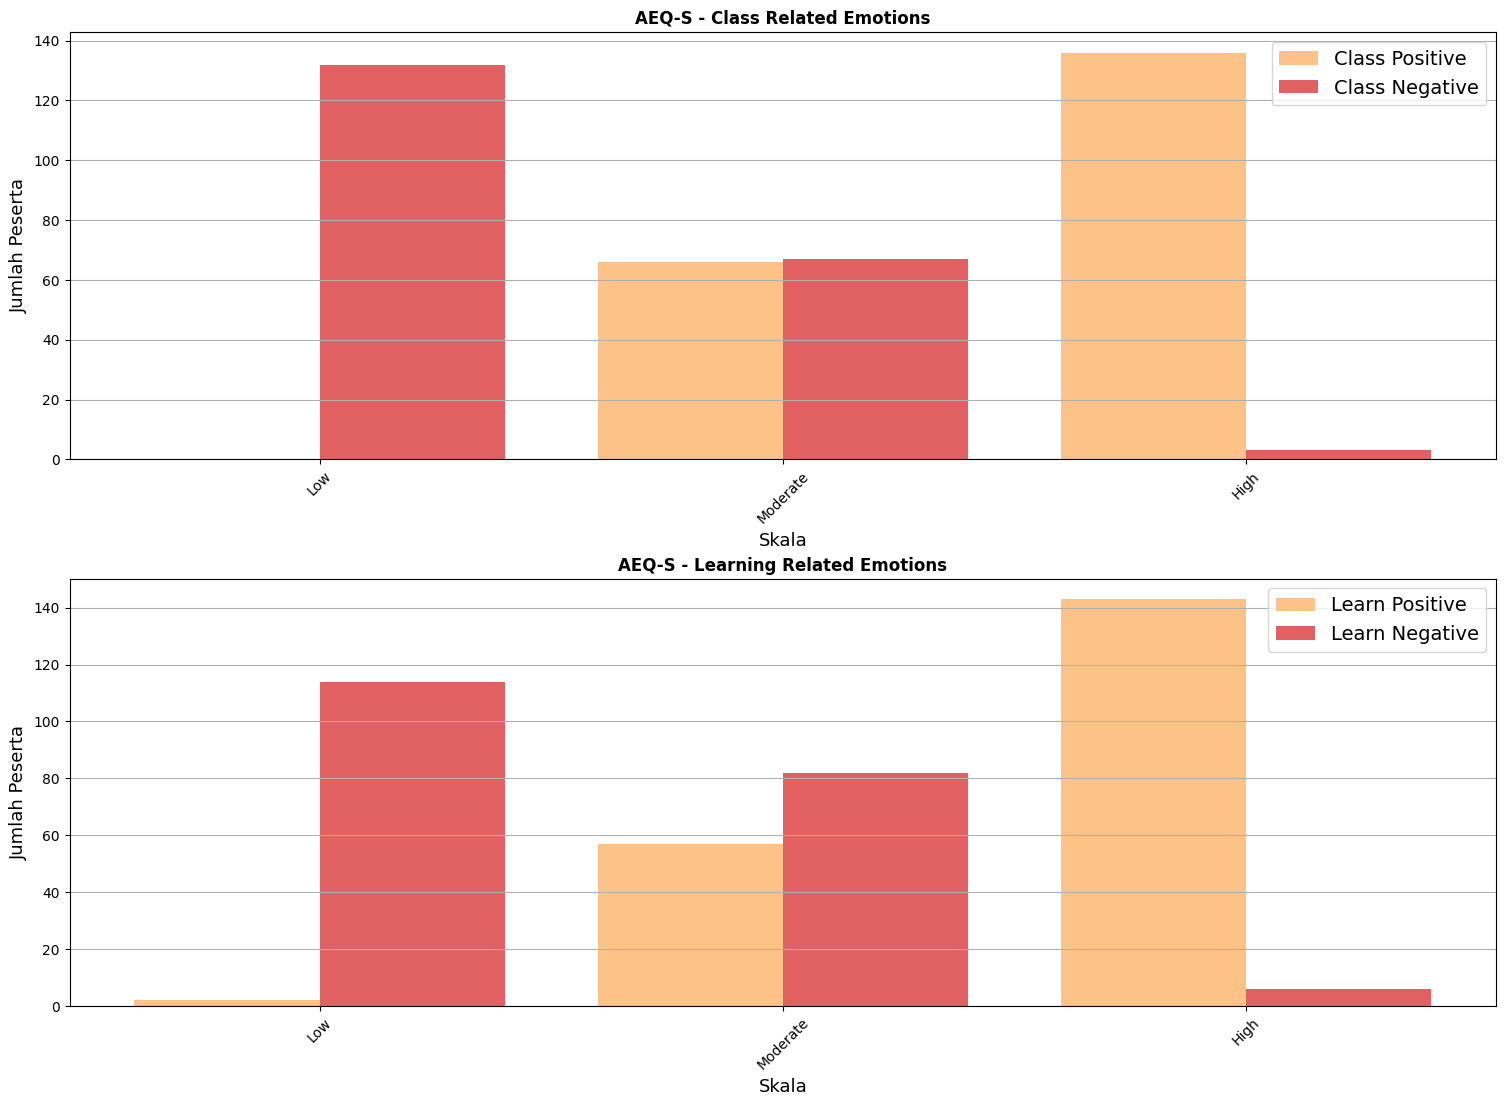

In [40]:
# membuat plot untuk memvisualisasikan persebaran data AEQ berdasarkan emosi dan pengaturannya
fig = plt.figure(figsize=(15,11))
gs = fig.add_gridspec(2,2)

# plot 1 - Class-Related
ax1 = fig.add_subplot(gs[0,:])
X_axis = np.arange(len(dict_aeq))
ax1.bar(X_axis - 0.2, pd.Series(dict_aeq_cp), 0.4, label = 'Class Positive', color='#FCC287')
ax1.bar(X_axis + 0.2, pd.Series(dict_aeq_cn), 0.4, label = 'Class Negative', color='#E16162')

ax1.set_xticks(X_axis, dict_aeq.keys(), rotation=45)
ax1.set_title("AEQ-S - Class Related Emotions",fontweight='bold')
ax1.set_ylabel("Jumlah Peserta",fontsize=13)
ax1.set_xlabel("Skala",fontsize=13)
ax1.legend(fontsize=14)
ax1.grid(True, axis='y')


# plot 2 - Learning-Related
ax2 = fig.add_subplot(gs[1,:])
X_axis = np.arange(len(dict_aeq))
ax2.bar(X_axis - 0.2, pd.Series(dict_aeq_lp), 0.4, label = 'Learn Positive', color='#FCC287')
ax2.bar(X_axis + 0.2, pd.Series(dict_aeq_ln), 0.4, label = 'Learn Negative', color='#E16162')

ax2.set_xticks(X_axis, dict_aeq.keys(), rotation=45)
ax2.set_title("AEQ-S - Learning Related Emotions",fontweight='bold')
ax2.set_ylabel("Jumlah Peserta",fontsize=13)
ax2.set_xlabel("Skala",fontsize=13)
ax2.legend(fontsize=14)
ax2.grid(True, axis='y')


plt.tight_layout(pad=0.5)
plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa terjadi imbalance data pada perbandingan emosi yang positif dan negatif. Imbalance data terjadi karena mahasiswa cenderung memiliki emosi positif yang tinggi dan emosi negatif yang rendah. Hal ini baik karena dapat diartikan dengan mahasiswa cenderung memiliki emosi positif saat di kelas dan saat pembelajaran berlangsung. Kemudian diketahui juga bahwa pada kategori moderate, emosi mahasiswa cenderung merata atau seimbang antara emosi negatif dan positif.

### Visualisasi DASS

In [41]:
# D / Depression =  3,5,10,13,16,17,21
# A / Anxiety = 2,4,7,9,15,19,20
# S / Stress = 1,6,8,11,12,14,18

# membuat kolom baru untuk menjumlahkan data likert scale masing-masing mahasiswa
# berdasarkan jenis emosi
df_dass_new['Depression'] = df_dass_new.iloc[:,[4,6,11,14,17,18,22]].sum(axis=1)
df_dass_new['Anxiety'] = df_dass_new.iloc[:,[3,5,8,10,16,20,21]].sum(axis=1)
df_dass_new['Stress'] = df_dass_new.iloc[:,[2,7,9,12,13,15,19]].sum(axis=1)

In [42]:
# mengubah label dass dari numerik menjadi label kategorikal berdasarkan intervalnya

# Depression
df_dass_new['Depression'] = np.where(df_dass_new['Depression'].between(0,9), "Normal", 
    np.where(df_dass_new['Depression'].between(10,13), "Mild",
    np.where(df_dass_new['Depression'].between(14,20), "Moderate",
    np.where(df_dass_new['Depression'].between(21,27), "Severe",
    np.where(df_dass_new['Depression'] >= 28, "Extremely severe", df_dass_new['Depression'])))))

# Anxiety
df_dass_new['Anxiety'] = np.where(df_dass_new['Anxiety'].between(0,7), "Normal",
    np.where(df_dass_new['Anxiety'].between(8,9), "Mild",
    np.where(df_dass_new['Anxiety'].between(10,14), "Moderate",
    np.where(df_dass_new['Anxiety'].between(15,19), "Severe", 
    np.where(df_dass_new['Anxiety'] >= 20, "Extremely severe", df_dass_new['Anxiety'])))))

# Stress
df_dass_new['Stress'] = np.where(df_dass_new['Stress'].between(0,14), "Normal", 
    np.where(df_dass_new['Stress'].between(15,18), "Mild", 
    np.where(df_dass_new['Stress'].between(19,25), "Moderate", 
    np.where(df_dass_new['Stress'].between(26,33), "Severe", 
    np.where(df_dass_new['Stress'] >= 34, "Extremely severe", df_dass_new['Stress'])))))

In [43]:
df_dass_new.head(2)

,NIM,Mata Kuliah,1. Saya sulit untuk ditenangkan,2. Saya merasa mulut saya kering,3. Saya tidak dapat merasakan perasaan yang positif,4. Saya mengalami kesulitan bernafas,5. Saya sulit mendapatkan semangat untuk melakukan sesuatu,6. Saya cenderung bertindak berlebihan,7. Saya mengalami gemetaran pada tangan,8. Saya merasakan menggunakan banyak energi untuk cemas,...,15. Saya mudah menjadi panik,16. Saya tidak antusias terhadap sesuatu,17. Saya merasa tidak berharga,18. Saya mudah tersentuh,19. Saya merasakan kerja jantung saya,20. Saya merasa takut tanpa alasan yang jelas,21. Saya merasa hidup ini tidak berarti,Depression,Anxiety,Stress
0,205150207111012,Lainnya,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,2.0,1.0,1.0,1.0,Normal,Normal,Normal
1,205150200111037,Lainnya,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Normal,Normal,Normal


In [44]:
# mengambil data setiap kategori dass untuk divisualisasikan
dict_dass = {}
dict_dass['Normal'] = 0
dict_dass['Mild'] = 0
dict_dass['Moderate'] = 0
dict_dass['Severe'] = 0
dict_dass['Extremely Severe'] = 0

# depression
dict_dass_d = dict_dass.copy()
dict_dass_d.update(df_dass_new["Depression"].value_counts().to_dict())

# anxiety
dict_dass_a = dict_dass.copy()
dict_dass_a.update(df_dass_new["Anxiety"].value_counts().to_dict())

# stress
dict_dass_s = dict_dass.copy()
dict_dass_s.update(df_dass_new["Stress"].value_counts().to_dict())

print("Depresesion:", dict_dass_d)
print("Anxiety:", dict_dass_a)
print("Stress:", dict_dass_s)

Depresesion: {'Normal': 148, 'Mild': 33, 'Moderate': 20, 'Severe': 1, 'Extremely Severe': 0}
Anxiety: {'Normal': 96, 'Mild': 36, 'Moderate': 54, 'Severe': 16, 'Extremely Severe': 0}
Stress: {'Normal': 180, 'Mild': 19, 'Moderate': 3, 'Severe': 0, 'Extremely Severe': 0}


Didapatkan jumlah data setiap kategori pada DASS untuk divisualisasikan

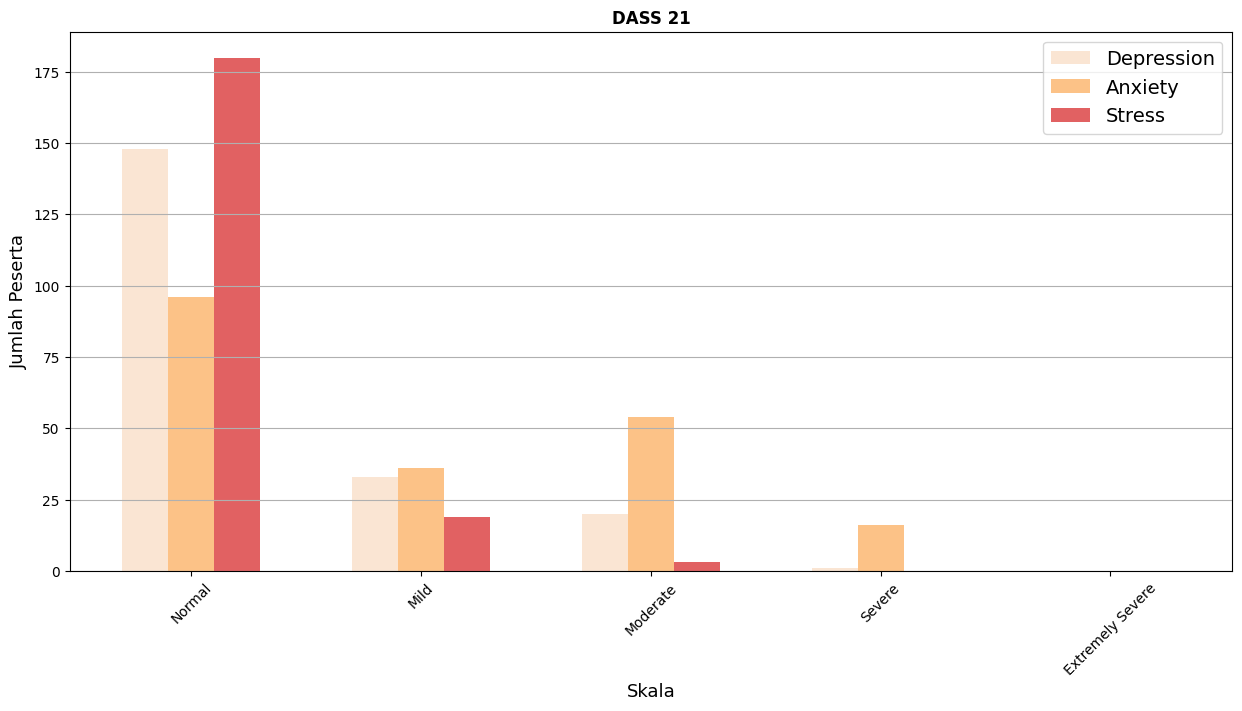

In [45]:
# membuat plot untuk memvisualisasikan persebaran data DASS berdasarkan emosi
plt.figure(figsize=(15,7))

X_axis = np.arange(len(dict_dass))
plt.bar(X_axis - 0.2, pd.Series(dict_dass_d), 0.2, label = 'Depression', color='#FAE5D3')
plt.bar(X_axis, pd.Series(dict_dass_a), 0.2, label = 'Anxiety', color='#FCC287')
plt.bar(X_axis + 0.2, pd.Series(dict_dass_s), 0.2, label = 'Stress', color='#E16162')

plt.xticks(X_axis, dict_dass.keys(), rotation=45)
plt.title("DASS 21",fontweight='bold')
plt.ylabel("Jumlah Peserta",fontsize=13)
plt.xlabel("Skala",fontsize=13)
plt.legend(fontsize=14)
plt.grid(True, axis='y')

plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa mahasiswa cenderung memiliki emosi yang positif. Sifat kuesioner DASS adalah mengukur emosi negatif, sehingga dapat diketahui bahwa mahasiswa sebagian besar memiliki emosi negatif yang normal. Mahasiswa dengan emosi negatif pada kategori mild ke atas cenderung lebih sedikit. 

### Visualisasi ERQ

In [46]:
# Cognitive Reappraisal Facet (CRF) = semakin tinggi semakin positif
# Expressive Suppression Facet (ESF) = semakin rendah semakin positif
# CRF = 1,3,5,7,8,10
# ESF = 2,4,6,9 

# membuat kolom baru untuk menjumlahkan data likert scale masing-masing mahasiswa
# berdasarkan jenis emosi
df_erq_new['CRF'] = df_erq_new.iloc[:,[2,4,6,8,9,11]].sum(axis=1)
df_erq_new['ESF'] = df_erq_new.iloc[:,[3,5,7,10]].sum(axis=1)

In [47]:
# mengubah label erq dari numerik menjadi label kategorikal berdasarkan intervalnya

# ERQ Emotion Scale
# CRF
# 6 - 18 = Low 
# 19 - 30 Moderate 
# 31 - 42 = High

df_erq_new['CRF'] = np.where(df_erq_new['CRF'].between(6,18), "Low", 
    np.where(df_erq_new['CRF'].between(19,30), "Moderate",
    np.where(df_erq_new['CRF'].between(31,42), "High", df_erq_new['CRF'])))

# ESF
# 20 - 40 = Low
# 41- 60 = Moderate
# 61 - 80 = High

df_erq_new['ESF'] = np.where(df_erq_new['ESF'].between(4,12), "Low",
    np.where(df_erq_new['ESF'].between(13,20), "Moderate",
    np.where(df_erq_new['ESF'].between(21,28), "High", df_erq_new['ESF'])))

In [48]:
df_erq_new.head(2)

,NIM,Mata Kuliah,"1.\t_____ Ketika saya ingin merasakan lebih banyak emosi positif (seperti kegembiraan atau hiburan), saya merubah apa yang saya pikirkan.",2.\t_____ Saya menyimpan emosi saya untuk diri saya sendiri.,"3.\t_____ Ketika saya ingin mengurangi emosi negatif (seperti kesedihan atau kemarahan), saya mengubah apa yang saya pikirkan.","4.\t_____ Ketika saya merasakan emosi positif, saya berhati-hati untuk tidak mengungkapkannya.","5.\t_____ Ketika saya menghadapi situasi stres, saya membuat diri saya memikirkannya dengan cara yang membantu saya tetap tenang.",6.\t_____ Saya mengendalikan emosi saya dengan tidak mengungkapkannya.,"7.\t_____ Ketika saya ingin merasakan emosi yang lebih positif, saya mengubah cara saya berpikir tentang situasi tersebut.",8.\t_____ Saya mengendalikan emosi saya dengan mengubah cara saya berpikir tentang situasi yang saya hadapi.,"9.\t_____ Ketika saya merasakan emosi negatif, saya memastikan untuk tidak mengungkapkannya.","10.\t_____ Ketika saya ingin mengurangi emosi negatif, saya mengubah cara saya berpikir tentang situasi tersebut.",CRF,ESF
0,205150207111012,Lainnya,5.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,Moderate,Moderate
1,205150200111037,Lainnya,2.0,7.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,7.0,Moderate,High


In [49]:
# mengambil data setiap kategori erq untuk divisualisasikan
dict_erq = {}
dict_erq['Low'] = 0
dict_erq['Moderate'] = 0
dict_erq['High'] = 0

# CRF
dict_erq_crf = dict_erq.copy()
dict_erq_crf.update(df_erq_new["CRF"].value_counts().to_dict())

# ESF
dict_erq_esf = dict_erq.copy()
dict_erq_esf.update(df_erq_new["ESF"].value_counts().to_dict())

print("CRF:", dict_erq_crf)
print("ESF:", dict_erq_esf)

CRF: {'Low': 0, 'Moderate': 165, 'High': 37}
ESF: {'Low': 17, 'Moderate': 165, 'High': 20}


Didapatkan jumlah data setiap kategori pada ERQ untuk divisualisasikan

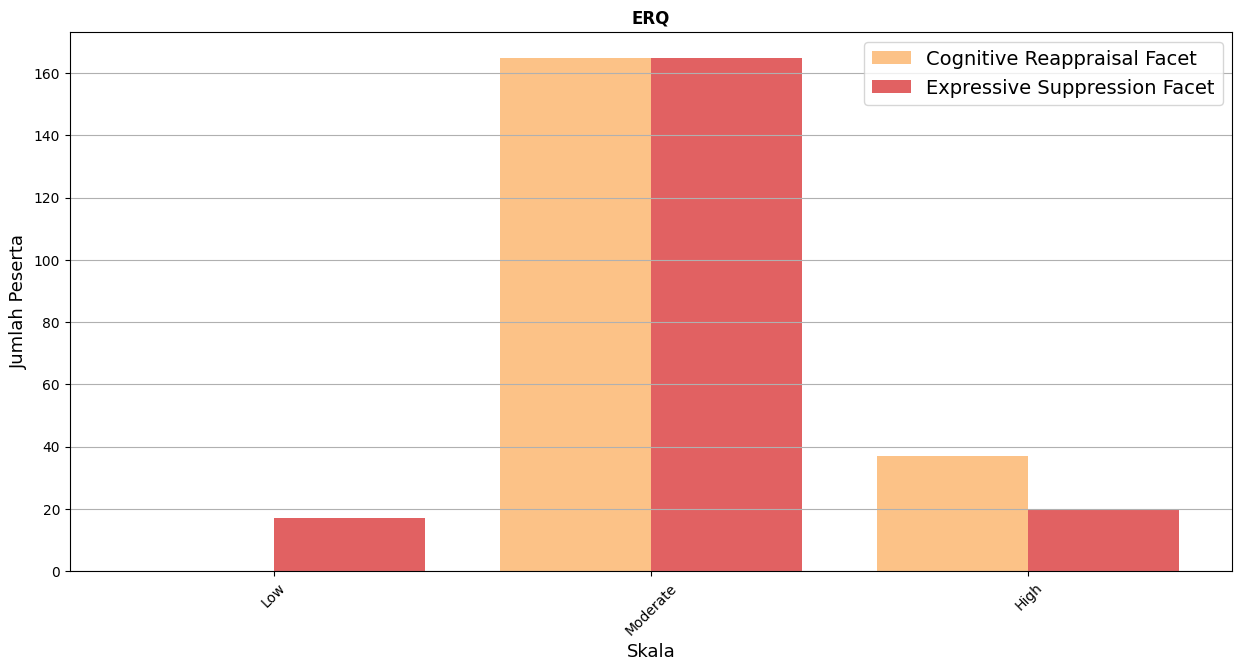

In [50]:
# membuat plot untuk memvisualisasikan persebaran data ERQ berdasarkan emosi 
plt.figure(figsize=(15,7))

X_axis = np.arange(len(dict_erq))
plt.bar(X_axis - 0.2, pd.Series(dict_erq_crf), 0.4, label = 'Cognitive Reappraisal Facet', color='#FCC287')
plt.bar(X_axis + 0.2, pd.Series(dict_erq_esf), 0.4, label = 'Expressive Suppression Facet', color='#E16162')

plt.xticks(X_axis, dict_erq.keys(), rotation=45)
plt.title("ERQ",fontweight='bold')
plt.ylabel("Jumlah Peserta",fontsize=13)
plt.xlabel("Skala",fontsize=13)
plt.legend(fontsize=14)
plt.grid(True, axis='y')

plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa mahasiswa memiliki proporsi emosi positif dan negatif yang seimbang. Hal ini diketahui dari jumlah data pada kategori moderate yang dominan daripada dua kategoi yang lain. Sedangkan kategori high dan low cenderung sedikit.

### Visualisasi Nilai

In [51]:
df_nilai_new

,NIM,Mata Kuliah,nilai_pretest,nilai_posttest,delta
0,205150207111012,Lainnya,25.0,25.0,0.0
1,205150200111037,Lainnya,25.0,25.0,0.0
2,205150200111025,Lainnya,25.0,25.0,0.0
3,205150200111067,Lainnya,25.0,25.0,0.0
4,205150201111016,Lainnya,25.0,23.0,-2.0
...,...,...,...,...,...
226,195150200111028,VD,22.0,24.0,2.0
227,205150601111004,DIMP C,23.0,26.0,3.0
228,205150407111030,ADSI E,24.0,24.0,0.0
231,205150607111006,DIMP C,19.0,16.0,-3.0


In [52]:
# melabelkan nilai pre-test, post-test, dan delta sesuai dengan kategorinya

df_nilai_new['nilai_pretest'] = np.where(df_nilai_new['nilai_pretest'].between(0,8), "Low PreTest", 
    np.where(df_nilai_new['nilai_pretest'].between(9,16), "Moderate PreTest",
    np.where(df_nilai_new['nilai_pretest'] >= 17, "High PreTest", df_nilai_new['nilai_pretest'])))

df_nilai_new['nilai_posttest'] = np.where(df_nilai_new['nilai_posttest'].between(0,8), "Low PostTest", 
    np.where(df_nilai_new['nilai_posttest'].between(9,16), "Moderate PostTest",
    np.where(df_nilai_new['nilai_posttest'] >= 17, "High PostTest", df_nilai_new['nilai_posttest'])))

df_nilai_new['delta'] = np.where(df_nilai_new['delta'] < 0, "Negative Delta",
    np.where(df_nilai_new['delta'] >= 0, "Positive Delta", df_nilai_new['delta']))

In [53]:
# mengambil setiap kategori dari data pre-test, post-test dan delta untuk divisualisasikan
dict_pre = {}
dict_pre['Low PreTest'] = 0
dict_pre['Moderate PreTest'] = 0
dict_pre['High PreTest'] = 0

dict_post = {}
dict_post['Low PostTest'] = 0
dict_post['Moderate PostTest'] = 0
dict_post['High PostTest'] = 0

dict_dlt = {}
dict_dlt['Negative Delta'] = 0
dict_dlt['Positive Delta'] = 0

# Pre-test
dict_pre.update(df_nilai_new["nilai_pretest"].value_counts().to_dict())

# Post-test
dict_post.update(df_nilai_new["nilai_posttest"].value_counts().to_dict())

# Delta
dict_dlt.update(df_nilai_new["delta"].value_counts().to_dict())

print("PreTest:", dict_pre)
print("PostTest:", dict_post)
print("Delta:", dict_dlt)

PreTest: {'Low PreTest': 1, 'Moderate PreTest': 37, 'High PreTest': 164}
PostTest: {'Low PostTest': 0, 'Moderate PostTest': 9, 'High PostTest': 193}
Delta: {'Negative Delta': 45, 'Positive Delta': 157}


Didapatkan jumlah data setiap kategori pada nilai mahasiswa untuk divisualisasikan

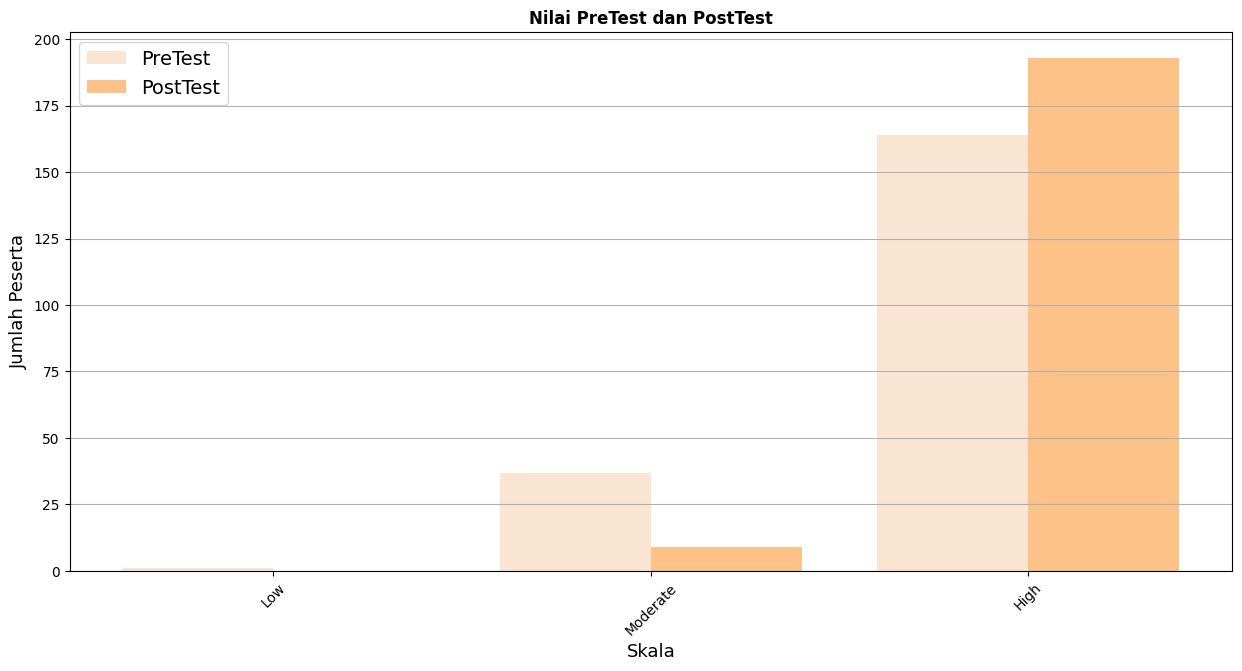

In [54]:
# membuat plot untuk memvisualisasikan persebaran data nilai pre-test dan post-test
plt.figure(figsize=(15,7))

X_axis = np.arange(len(dict_pre))
plt.bar(X_axis - 0.2, pd.Series(dict_pre), 0.4, label = 'PreTest', color='#FAE5D3')
plt.bar(X_axis + 0.2, pd.Series(dict_post), 0.4, label = 'PostTest', color='#FCC287')

plt.xticks(X_axis, ['Low', 'Moderate', 'High'], rotation=45)
plt.title("Nilai PreTest dan PostTest",fontweight='bold')
plt.ylabel("Jumlah Peserta",fontsize=13)
plt.xlabel("Skala",fontsize=13)
plt.legend(fontsize=14)
plt.grid(True, axis='y')

plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa mahasiswa yang sudah memahami materi HTML dan CSS sebelum menggunakan platform HSS Learning sudah cukup banyak. Hal ini dapat dilihat pada jumlah data kategori high nilai pre-test yang sudah banyak. Kemudian, setelah menggunakan platform HSS Learning, pengetahuan mahasiswa cenderung terjadi peningkatan sehingga jumlah data kategori high nilai post-test lebih banyak daripada pre-test. Terdapat sejumlah mahasiswa yang tergolong dalam kategori moderate dan bahkan low. Namun, tidak ada mahasiswa yang tergolong dalam kategori low pada nilai post-test.

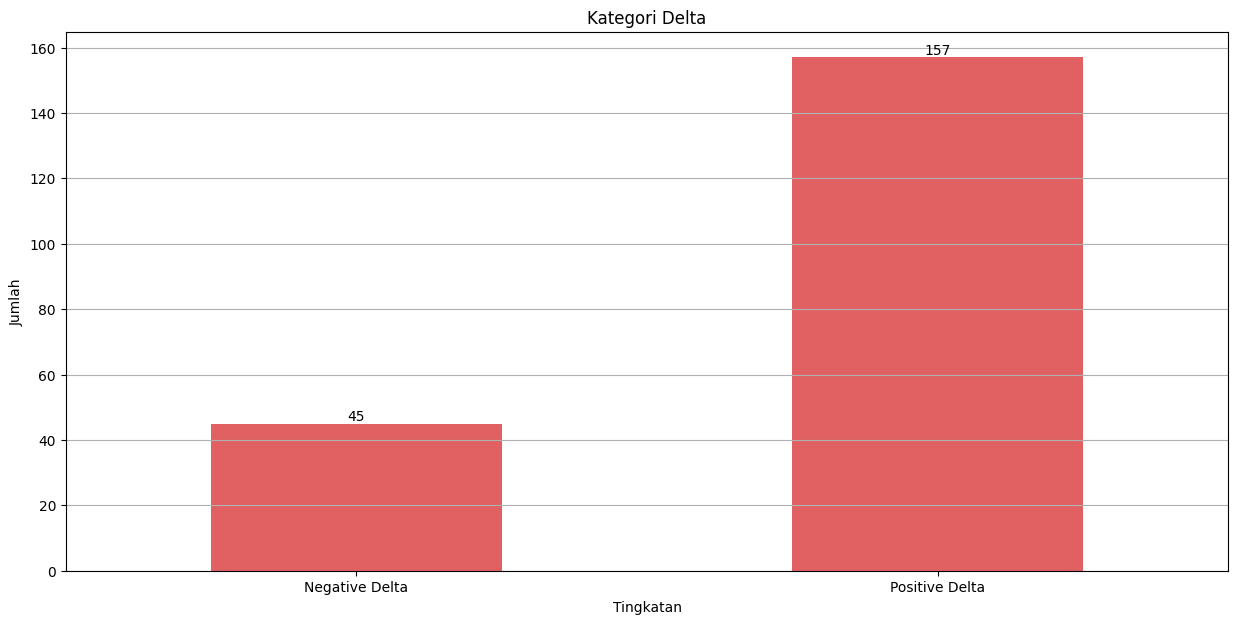

In [55]:
# membuat plot untuk memvisualisasikan persebaran data perubahan nilai atau delta
ax = pd.Series(dict_dlt).plot(kind='bar', figsize=(15, 7), color='#E16162')

for container in ax.containers:
    ax.bar_label(container)

plt.title("Kategori Delta")
plt.ylabel("Jumlah")
plt.xlabel("Tingkatan")
plt.xticks(rotation=0)
plt.grid(True, axis='y')

plt.show()

--> Penjelasan

Pada visualisasi di atas, diketahui bahwa perubahan nilai (delta) mahasiswa lebih banyak bersifat positif. Delta positif menandakan adanya peningkatan nilai atau setidaknya mahasiswa dapat mempertahankan nilainya setelah menggunakan platform HSS Learning. Sebaliknya, delta negatif menandakan adanya penurunan nilai setelah menggunakan platform HSS Learning. Dengan demikian, dapat disimpulkan bahwa setelah menggunakan platform ini, perubahan nilai mahasiswa cenderung bersifat positif.

<hr>
<hr>

# 4. Dashboard

Export Dataset & Evaluasi Model ke File Excel

Pada bagian ini, dataset akan di-export ke dalam file excel. File Excel tersebut kemudian digunakan untuk membuat dashboard menggunakan Streamlit.

In [56]:
# Membuat Pandas Excel writer dengan XlsxWriter sebagai engine
writer_main = pd.ExcelWriter('main/main_dataset.xlsx')

# Write data classification report ke worksheet berbeda
df.to_excel(writer_main, sheet_name='df')
df_aeq_new.to_excel(writer_main, sheet_name='aeq')
df_dass_new.to_excel(writer_main, sheet_name='dass')
df_erq_new.to_excel(writer_main, sheet_name='erq')
df_nilai_new.to_excel(writer_main, sheet_name='nilai')

# Close Pandas Excel writer dan output file Excel
writer_main.save()

Output dari kode di atas adalah satu file excel (xlsx):
1. main_dataset.xlsx
    - Terdiri dari 5 sheet
    - Masing-masing sheet berisi dataset yang digunakan dalam proyek ini.

File excel ini kemudian akan digunakan dalam Streamlit untuk pembuatan dashboard.

Alhamdulillah.

Praktik Kerja Lapangan

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d50ba51-483e-487a-a800-81d0e24d7a16' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>